In [ ]:
%reload_ext autoreload

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os
import extract as e
import structure as s
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from datetime import datetime

In [3]:
from plotting import plots

In [4]:
import dfconvert as dfC
from dfconvert import df_store

Ipython active


In [91]:
df = df_store('data').load_df()
print(df.head())


Loading pickle: data\data...
dataframe loaded successfully
                 date      d1      d2      d3      d4    v  Year  Month  Week  \
0 2002-03-03 19:04:00  0.6100  0.6100  0.6099  0.6100  0.0  2002      3     9   
1 2002-03-03 19:05:00  0.6100  0.6100  0.6099  0.6099  0.0  2002      3     9   
2 2002-03-03 19:06:00  0.6099  0.6099  0.6099  0.6099  0.0  2002      3     9   
3 2002-03-03 19:07:00  0.6099  0.6100  0.6099  0.6100  0.0  2002      3     9   
4 2002-03-03 19:08:00  0.6099  0.6101  0.6099  0.6101  0.0  2002      3     9   

   Day  ...  Is_month_end  Is_month_start  Is_quarter_end  Is_quarter_start  \
0    3  ...         False           False           False             False   
1    3  ...         False           False           False             False   
2    3  ...         False           False           False             False   
3    3  ...         False           False           False             False   
4    3  ...         False           False           False  

In [92]:
len(df)

5449388

In [6]:
import matplotlib.pyplot as plt

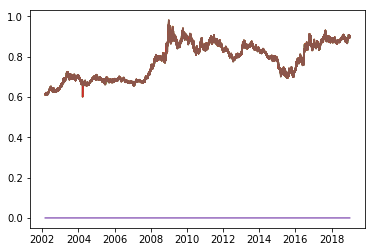

In [7]:
plots(df, None)

In [58]:
import numpy as np

In [64]:
#largest = df.filter(['d1'], axis=1)
largest = df[['d3']].copy(deep=False)
largest['diff_t'] = np.sqrt(((largest['d3'].shift(1) - largest['d3'])/largest['d3'])**2)*100

largest = largest.nlargest(10, 'diff_t')
largest




d3     diff_t
564134   0.60000  11.399994
564135   0.66840  10.233388
4623424  0.90254   2.014316
4537095  0.82504   1.701735
4516317  0.78072   1.688188
4824010  0.84972   1.519325
1902624  0.91530   1.442148
3315239  0.85329   1.353578
4723554  0.88294   1.253767
4517619  0.81924   1.251156

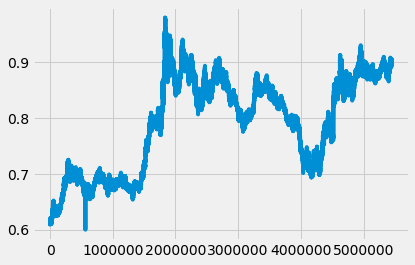

In [191]:
plt.plot(df['d3'])

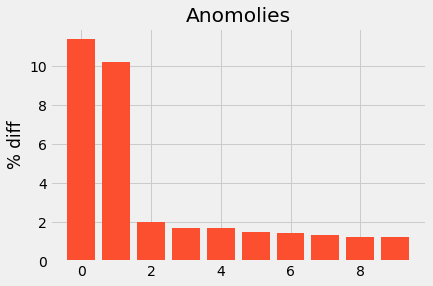

In [234]:
import numpy as np


class anomoly_detect():
    """
    e.g.
    anomoly_detect(df, 'd3').anomolies
    d = anomoly_detect(df, 'd3').rm_anomolies(toNaN=False)
    """
    def __init__(self, df, variable, xlen = 10, graph = True):        
        self.df = df.copy()
        self.variable = variable
        self.xlen = xlen
        self.graph = graph
        
        self.anomolies = self.differences_collect()
        
        if self.graph == True:
            self.graph_anomolies(largest, 'diff_t', self.variable, self.xlen)

            
    def differences_collect(self):
        largest = self.df[[self.variable]].copy(deep=False)
        largest['diff_t'] = np.sqrt(((largest[self.variable].shift(1) - largest[self.variable])/largest[self.variable])**2)*100
        largest = largest.nlargest(self.xlen, 'diff_t')
        return largest

    def graph_anomolies(self, largest, diff_t, variable, xlen):
        plt.style.use('fivethirtyeight')
        x_values = list(range(xlen))
        plt.bar(x_values, largest[diff_t], orientation='vertical')
        plt.ylabel('% diff')
        plt.title('Anomolies')
        
    def rm_anomolies(self, toNaN = True):
        anom_list = list(self.anomolies.reset_index()['index'])
        for i in range(len(anom_list)-1):
            cur = anom_list[i+1]
            prev = anom_list[i]
            if cur == prev + 1:
                if toNaN == False:
                    self.df.drop(self.df.index[prev])
                elif toNaN != False:
                    self.df.loc[self.df.index == prev, self.variable] = np.NaN
        return self.df
                
        

a = anomoly_detect(df, 'd3').anomolies
d = anomoly_detect(df, 'd3').rm_anomolies(toNaN=False)


In [235]:
d[564133:564136]

date      d1      d2      d3      d4    v  Year  Month  \
564133 2004-03-26 16:22:00  0.6684  0.6685  0.6684  0.6684  0.0  2004      3   
564134 2004-03-26 16:23:00  0.6685  0.6685     NaN  0.6000  0.0  2004      3   
564135 2004-03-28 09:02:00  0.6684  0.6684  0.6684  0.6684  0.0  2004      3   

        Week  Day  ...  Is_month_end  Is_month_start  Is_quarter_end  \
564133    13   26  ...         False           False           False   
564134    13   26  ...         False           False           False   
564135    13   28  ...         False           False           False   

        Is_quarter_start  Is_year_end  Is_year_start  not_dupym  daysinmonth  \
564133             False        False          False          0          731   
564134             False        False          False          0          731   
564135             False        False          False          0          731   

        aggdays  d1_lag-1  
564133      757    0.6685  
564134      757    0.6684  
564135      759    0.6684  

[3 rows x 22 columns]

In [229]:

a.drop(a.index[1902624])
a

IndexError: index 1902624 is out of bounds for axis 0 with size 10

In [230]:
a

d3    diff_t
4623424  0.90254  2.014316
4537095  0.82504  1.701735
4516317  0.78072  1.688188
4824010  0.84972  1.519325
1902624  0.91530  1.442148
3315239  0.85329  1.353578
4723554  0.88294  1.253767
4517619  0.81924  1.251156
1793802  0.85040  1.222961
4497919  0.77513  1.179159

In [ ]:
df.mean(numeric_only=True, axis=0)

In [ ]:
subset = df.iloc[:10000].reset_index()
subset.head()

In [ ]:
subset = s.date_split(subset, 'date')


In [ ]:
subset.head()

In [ ]:
subset = s.add_rand(subset)
subset.head()

In [ ]:
subset['mean'] = subset.mean(numeric_only=True, axis=1)


In [ ]:
subset.head()

In [ ]:
features = pd.get_dummies(subset)

In [ ]:
features.iloc[:, 5:14].head()

In [ ]:
def drop_col(df, col_names):
    for col in col_names:
        if col in df.columns:
            df = df.drop(col, axis = 1)
    return df

features = drop_col(features, ['date', 'd2', 'd3', 'd4', 'index'])

In [ ]:
features.head()

In [ ]:
if 'd1' in features:
    labels = np.array(features['d1'])
    features = features.drop('d1', axis = 1)
elif 'rnd' in features:
    labels = np.array(features['rnd'])
    features = features.drop('rnd', axis = 1)

feature_list = list(features.columns)
print(feature_list)
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state=42)
print(train_features.shape)
print(test_features.shape)
print(train_labels.shape)
print(test_labels.shape)

In [ ]:
#historical average
baseline_preds = test_features[:,feature_list.index('mean')]
print(baseline_preds)
baseline_errors = abs(baseline_preds - test_labels)
baseline_errors[:10]


In [ ]:
print('av basline error: ', round(np.mean(baseline_errors), 2))


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=5, max_depth=50, n_jobs=-1)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('mean absolute error: ', np.mean(errors), 'degrees.')


In [ ]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('accuracy:', round(accuracy, 2), '%.')

In [ ]:
importances = list(rf.feature_importances_)
print(importances)
feature_importances = [(feature, importance) for feature, importance in zip (feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('variable: {:20} importance : {}'.format(*pair)) for pair in feature_importances]

In [ ]:
important_indices = [feature_list.index('Dayofweek'), feature_list.index('mean')]
train_important=train_features[:,important_indices]
test_important=test_features[:,important_indices]
rf.fit(train_important, train_labels)
predictions= rf.predict(test_important)
errors = abs(predictions-test_labels)
print(errors)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('fivethirtyeight')
x_values=list(range(len(importances)))
plt.bar(x_values, importances, orientation='vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('var importance')



In [ ]:
years = test_features[:, feature_list.index('Year')]
months = test_features[:feature_list.index('Month')]
days = test_features[:, feature_list.index('Day')]
print("YEARS: " , years)
print("MONTHS: " , months)
print("DAYS: " , days)



In [ ]:
test_features[:100, 'year']

In [ ]:
a=list(zip(years, months, days))
print(a)

In [ ]:
test_dates = [str(int(year)) + '-' + str(int(month))+'-' + str(int(day)) for year, month, day in zip(years, months, days)]

test_dates = [datetime.strftime(date, '%Y-%m-%d') for date in test_dates]
prediction_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})


In [ ]:

plt.plot(prediction_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation  = '60')
plt.ylabel('date')
plt.xlabel('actual and predicted')